# **Reconhecimento de atividade humana usando dados de smartphone**

### **Importando as bibliotecas**

In [1]:
# Importando as bibliotecas necessárias

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Baixando e lendo os conjuntos de dados

test = 'https://thecleverprogrammer.com/wp-content/uploads/2020/05/test.csv'
test = pd.read_csv(test)

train = 'https://thecleverprogrammer.com/wp-content/uploads/2020/05/train-1.csv'
train = pd.read_csv(train)


In [3]:
# Concatendo os dois quadros de dados

train['Data'] = 'Train'
test['Data'] = 'Test'
both = pd.concat([train, test], axis=0).reset_index(drop=True)
both['subject'] = '#' + both['subject'].astype(str)

In [4]:
train.shape, test.shape

((7352, 564), (2947, 564))

In [5]:
both.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,Data
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,#1,STANDING,Train
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,#1,STANDING,Train
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,#1,STANDING,Train
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,#1,STANDING,Train
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,#1,STANDING,Train


In [6]:
# Exibindo valores da coluna 'Activity'

print(both['Activity'].unique())

['STANDING' 'SITTING' 'LAYING' 'WALKING' 'WALKING_DOWNSTAIRS'
 'WALKING_UPSTAIRS']


In [7]:
# Traduzindo as linhas da coluna 'Activity'

both['Activity'] = both['Activity'].map({'LAYING': 'DEITADO', 'SITTING': 'SENTADO', 'STANDING': 'EM_PE', 
                          'WALKING': 'ANDANDO', 'WALKING_DOWNSTAIRS': 'ANDANDO_DESCENDO_ESCADA', 'WALKING_UPSTAIRS': 'ANDANDO_SUBINDO_ESCADA'})

In [8]:
# Exibindo valores da coluna 'Activity' traduzidos

print(both['Activity'].unique())


['EM_PE' 'SENTADO' 'DEITADO' 'ANDANDO' 'ANDANDO_DESCENDO_ESCADA'
 'ANDANDO_SUBINDO_ESCADA']


In [9]:
both.dtypes.value_counts()

float64    561
object       3
dtype: int64

In [10]:
# Função para exibir detalhes básicos 

def basic_details(df):
    b = pd.DataFrame()
    b['Missing value'] = df.isnull().sum()
    b['N unique value'] = df.nunique()
    b['dtype'] = df.dtypes
    return b
basic_details(both)

,Missing value,N unique value,dtype
tBodyAcc-mean()-X,0,10292,float64
tBodyAcc-mean()-Y,0,10299,float64
tBodyAcc-mean()-Z,0,10293,float64
tBodyAcc-std()-X,0,10295,float64
tBodyAcc-std()-Y,0,10297,float64
...,...,...,...
"angle(Y,gravityMean)",0,10299,float64
"angle(Z,gravityMean)",0,10299,float64
subject,0,30,object
Activity,0,6,object


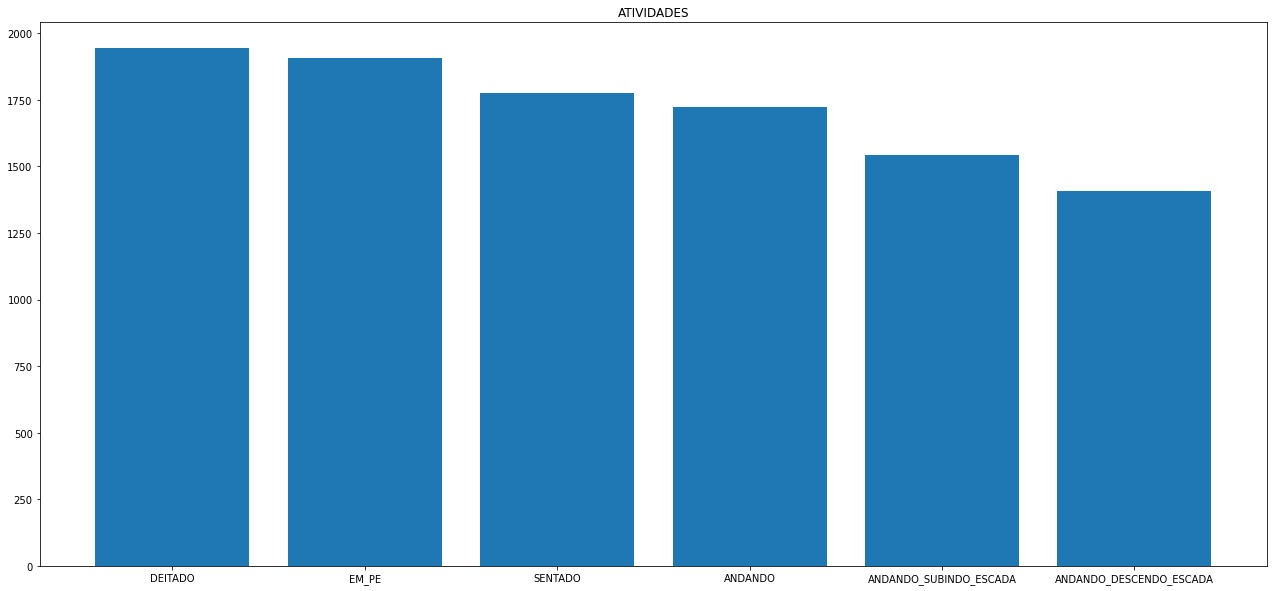

In [11]:
# Gráfico de atividades 

activity = both['Activity']
label_counts = activity.value_counts()

plt.figure(figsize= (22, 10))
plt.title('ATIVIDADES')
plt.bar(label_counts.index, label_counts);

In [12]:
Data = both['Data']
Subject = both['subject']
train = both.copy()
train = train.drop(['Data','subject','Activity'], axis =1)

### **Dimensionando os dados**

In [13]:
# Escalonador Padrão
from sklearn.preprocessing import StandardScaler
slc = StandardScaler()
train = slc.fit_transform(train)

# redução de dimensionalidade
from sklearn.decomposition import PCA
pca = PCA(n_components=0.9, random_state=0)
train = pca.fit_transform(train)

### **Dividindo os dados em treinamento e teste**

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, activity, test_size = 0.2, random_state = 0)

### **Opções de teste e métrica de avaliação**

In [15]:
num_folds = 10
seed = 0
scoring = 'accuracy'
results = {}
accuracy = {}

### **Algoritmo de Reconhecimento de Atividade**

                         precision    recall  f1-score   support

                ANDANDO       0.96      0.99      0.97       335
ANDANDO_DESCENDO_ESCADA       0.99      0.95      0.97       278
 ANDANDO_SUBINDO_ESCADA       0.98      0.98      0.98       316
                DEITADO       1.00      1.00      1.00       377
                  EM_PE       0.89      0.93      0.91       390
                SENTADO       0.92      0.87      0.90       364

               accuracy                           0.95      2060
              macro avg       0.96      0.95      0.95      2060
           weighted avg       0.95      0.95      0.95      2060



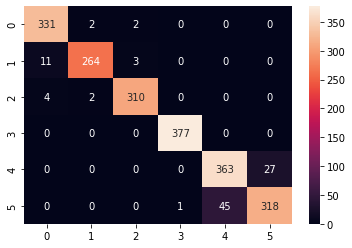

In [16]:
# Finalizar o modelo e comparar o teste, prever resultados
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import KFold, cross_val_score
model = KNeighborsClassifier(algorithm= 'auto', n_neighbors= 8, p= 1, weights= 'distance')

_ = cross_val_score(model, X_train, y_train, cv=10, scoring=scoring)
results["GScv"] = (_.mean(), _.std())

model.fit(X_train, y_train) 
y_predict = model.predict(X_test)

accuracy["GScv"] = accuracy_score(y_test, y_predict)

print(classification_report(y_test, y_predict))

cm= confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True, fmt='');